# Imports

In [2]:
import nrrd
import matplotlib.pyplot as plt
import os
%matplotlib widget

# Data read

In [ ]:
roi_folder_path = "../../../shared_data/NSCLC_Radiogenomics/Liver_ROI/"
file_name = "R01-104"
pet_folder_path = "../../../shared_data/NSCLC_Radiogenomics/images/" + file_name + "/pet/"
file_names = os.listdir(roi_folder_path)

for temp_name in file_names:
    temp_image, _ = nrrd.read(roi_folder_path + temp_name)
    if temp_image.shape[2] < smallest_roi_z:
        smallest_roi_z = temp_image.shape[2]

print ('Smallest amount of slides: ', smallest_roi_z)
# mask_file_name = file_name + "_pet_liver.nrrd"
# mask_data, mask_header = nrrd.read(roi_folder_path + mask_file_name)

# image_file_name = file_name + "_pet_image.nrrd"
# image_data, image_header = nrrd.read(pet_folder_path + image_file_name)


# data = image_data * mask_data
# print(data.shape)

Files in folder:
144


In [14]:
print("Voxel spacings (mm):", header.get("spacings", "Unknown"))
print("Data type:", data.dtype)
print("Intensity range:", data.min(), "to", data.max())

Voxel spacings (mm): Unknown
Data type: float32
Intensity range: 0.0 to 10562.772


# Graficos

## Sliders

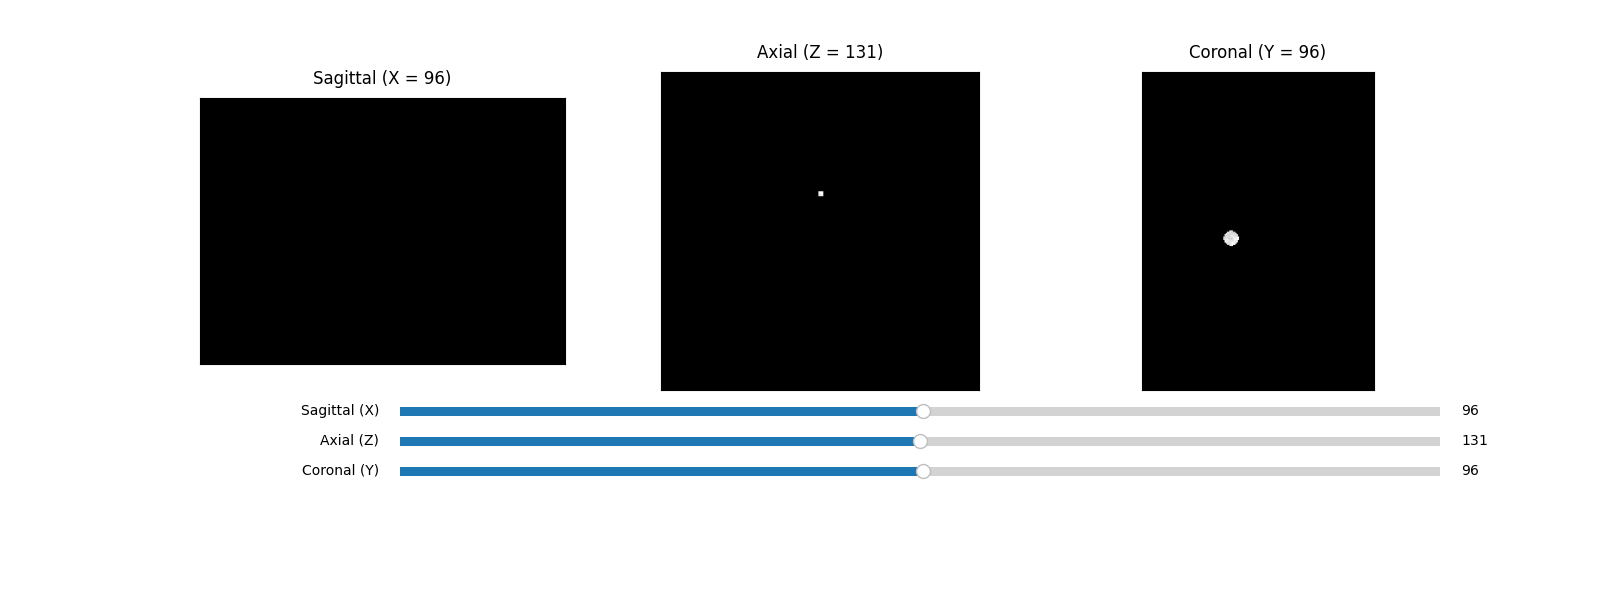

In [ ]:
from matplotlib.widgets import Slider

# Create figure with 3 subplots in anatomical order
fig, (ax_sagittal, ax_axial, ax_coronal) = plt.subplots(1, 3, figsize=(16, 6))
plt.subplots_adjust(bottom=0.35)  # Adjusted space for sliders

# Initial slices (middle of each dimension)
sagittal_idx = data.shape[0] // 2  # X-axis
axial_idx = data.shape[2] // 2     # Z-axis
coronal_idx = data.shape[1] // 2   # Y-axis

# Plot initial views with proper orientation
img_sagittal = ax_sagittal.imshow(data[sagittal_idx, :, :], cmap='gray')  # Sagittal (Y-Z)
img_axial = ax_axial.imshow(data[:, :, axial_idx], cmap='gray')           # Axial (X-Y)
img_coronal = ax_coronal.imshow(data[:, coronal_idx, :].T, cmap='gray')   # Coronal (X-Z, transposed)

# Set titles with anatomical labels
ax_sagittal.set_title(f"Sagittal (X = {sagittal_idx})", fontsize=12, pad=10)
ax_axial.set_title(f"Axial (Z = {axial_idx})", fontsize=12, pad=10)
ax_coronal.set_title(f"Coronal (Y = {coronal_idx})", fontsize=12, pad=10)

# Remove axis ticks for cleaner display
for ax in [ax_sagittal, ax_axial, ax_coronal]:
    ax.set_xticks([])
    ax.set_yticks([])

# Slider configuration
slider_height = 0.03
slider_bottom = 0.2
slider_spacing = 0.05

# SAGITTAL SLIDER (X-axis)
ax_slider_x = plt.axes([0.25, slider_bottom + 2*slider_spacing, 0.65, slider_height])
slider_x = Slider(ax_slider_x, 'Sagittal (X)', 0, data.shape[0]-1, valinit=sagittal_idx)

# AXIAL SLIDER (Z-axis)
ax_slider_z = plt.axes([0.25, slider_bottom + slider_spacing, 0.65, slider_height])
slider_z = Slider(ax_slider_z, 'Axial (Z)', 0, data.shape[2]-1, valinit=axial_idx)

# CORONAL SLIDER (Y-axis)
ax_slider_y = plt.axes([0.25, slider_bottom, 0.65, slider_height])
slider_y = Slider(ax_slider_y, 'Coronal (Y)', 0, data.shape[1]-1, valinit=coronal_idx)

# Update functions
def update_sagittal(val):
    x = int(slider_x.val)
    img_sagittal.set_data(data[x, :, :])
    ax_sagittal.set_title(f"Sagittal (X = {x})")
    fig.canvas.draw_idle()

def update_axial(val):
    z = int(slider_z.val)
    img_axial.set_data(data[:, :, z])
    ax_axial.set_title(f"Axial (Z = {z})")
    fig.canvas.draw_idle()

def update_coronal(val):
    y = int(slider_y.val)
    img_coronal.set_data(data[:, y, :].T)
    ax_coronal.set_title(f"Coronal (Y = {y})")
    fig.canvas.draw_idle()

# Connect sliders
slider_x.on_changed(update_sagittal)
slider_z.on_changed(update_axial)
slider_y.on_changed(update_coronal)

plt.show()

## 3D

In [18]:
import itk
import ipyvolume as ipv
import numpy as np

# 1. Load your NRRD file
image = itk.imread(pet_folder_path + file_name)
data_array = itk.array_from_image(image)

# 2. Normalize data to 0-1 range (important for visualization)
normalized_data = (data_array - np.min(data_array)) / (np.max(data_array) - np.min(data_array))

# 3. Create the 3D volume visualization
ipv.figure(width=800, height=600)
vol = ipv.volshow(
    normalized_data,
    level=[0.1, 0.5, 0.9],  # Adjust these thresholds for better visibility
    opacity=[0.01, 0.05, 0.1],  # Adjust opacity scaling
    controls=True,  # Adds interactive controls
    extent=[[0, 192], [0, 192], [0, 236]]  # Sets correct physical dimensions
)

# 4. Add labels and adjust view
ipv.xlabel('X axis')
ipv.ylabel('Y axis')
ipv.zlabel('Z axis')
ipv.style.use('dark')  # Try 'light' if preferred
ipv.show()

RuntimeError: Could not create IO object for reading file ../../../shared_data/NSCLC_Radiogenomics/images/R01-104/pet/R01-104
The file doesn't exist. 
Filename = ../../../shared_data/NSCLC_Radiogenomics/images/R01-104/pet/R01-104

# Predict

In [ ]:
import os
from pathlib import Path

# Get model pth
model_name = "medsam_transformer_stanford/pet/kfold_0"
model_path = Path("../models/petct_online") / model_name / "best_model_epoch.pth"


# Get image to predict
hdf5_path = "../../Data/lung_radiomics_datasets.hdf5"


Valid model file exists
